In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as cst 

# %matplotlib widget
%matplotlib inline

# use paper style 

# plt.style.use('paper_2')

colors= ["#264653", "#2a9d8f", "#8ab17d", "#e9c46a", "#f4a261", "#e76f51", "#b43718"]

params = {"ytick.color" : "black",
            "xtick.color" : "black",
            "axes.labelcolor" : "black",
            "axes.edgecolor" : "black", 
            "font.size": 14}
plt.rc('text', usetex=False)
font  = {'size' : 14}
plt.rc('font', **font)

fontsize = 14

In [4]:
T_vec = np.array([120, 160, 233, 317, 413, 430, 490, 522, 581, 605, 632, 775])*1e-3

P_off = np.array([-98.98, -98.86, -98.72, -98.92, -98.62, -98.63, -98.42, -98.44, -98.26, -98.15, -98.27, -97.90]) # noise power with twpa on
P_on = np.array([-91.20, -91.58, -90.69, -90.63, -88.45, -87.29, -86.25, -85.63, -84.37, -84.21, -83.90, -83.30]) # noise power with twpa off


P_off_lin = 10**(P_off/10)*1e-3
P_on_lin = 10**(P_on/10)*1e-3

bw = 360



In [5]:
T_min_fit = 400*1e-3

popt_off, pcov_off = np.polyfit(T_vec[T_vec > T_min_fit], P_off_lin[T_vec > T_min_fit], 1, cov=True)
popt_on, pcov_on = np.polyfit(T_vec[T_vec > T_min_fit], P_on_lin[T_vec > T_min_fit], 1, cov=True)

G_off = popt_off[0]/cst.k/bw
G_on = popt_on[0]/cst.k/bw

# error bars 

perr_off = np.sqrt(np.diag(pcov_off))
perr_on = np.sqrt(np.diag(pcov_on))

G_off_err = perr_off[0]/cst.k/bw
G_on_err = perr_on[0]/cst.k/bw

# print the results in db 

G_off_p = G_off + G_off_err
G_off_m = G_off - G_off_err

G_on_p = G_on + G_on_err
G_on_m = G_on - G_on_err

G_off_err_db = 10*np.log10(G_off_p) - 10*np.log10(G_off_m)
G_on_err_db = 10*np.log10(G_on_p) - 10*np.log10(G_on_m)

print(f'G_off = {10*np.log10(G_off)} +/- {G_off_err_db} dB')
print(f'G_on = {10*np.log10(G_on)} +/- {G_on_err_db} dB')

# for the noise temperature only take the first 3 points since it is the flat region 

P_hemt = np.mean(P_off_lin[:3])
P_hemt_err = np.std(P_off_lin[:3])

P_twpa = np.mean(P_on_lin[:3])
P_twpa_err = np.std(P_on_lin[:3])

# convert the power in linear units 



T_hemt = P_hemt/G_off/bw/cst.k
T_twpa = P_twpa/G_on/bw/cst.k

T_hemt_err = T_hemt*np.sqrt((P_hemt_err/P_hemt)**2 + (G_off_err/G_off)**2)
T_twpa_err = T_twpa*np.sqrt((P_twpa_err/P_twpa)**2 + (G_on_err/G_on)**2)


# print the results in K

print(f'T_hemt = {T_hemt} +/- {T_hemt_err} K')
print(f'T_twpa = {T_twpa} +/- {T_twpa_err} K')


G_off = 71.41202650857733 +/- 0.8108287566125227 dB
G_on = 92.74565495955028 +/- 0.9180849183133404 dB
T_hemt = 1.8932514157091898 +/- 0.18222120992659888 K
T_twpa = 0.08220892312335529 +/- 0.011097874564600891 K


In [6]:
-41.6-(-126.1+12.7+71.4)

0.39999999999998437

In [7]:
P_hemt/G_off

9.410096425850918e-21

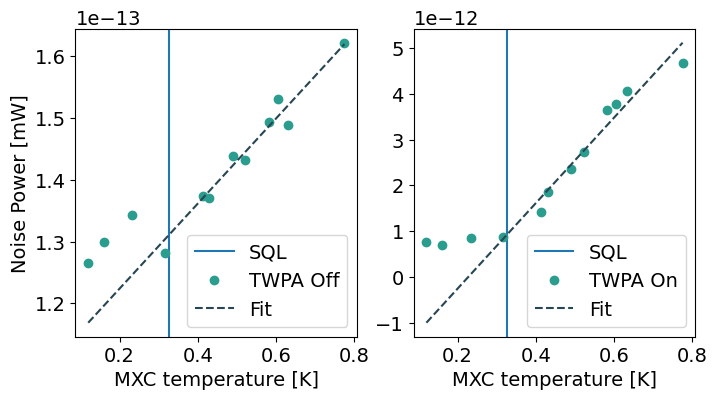

In [8]:
fig, ax = plt.subplots(1,2 , figsize=(8, 4))

plt.sca(ax[0])
plt.axvline(cst.h*(6.808e9)/cst.k, label='SQL')
ax[0].plot(T_vec, P_off_lin, 'o', label='TWPA Off', color = colors[1])
ax[0].plot(T_vec, np.polyval(popt_off, T_vec), '--', color = colors[0], label='Fit')

plt.sca(ax[1])
plt.axvline(cst.h*(6.808e9)/cst.k, label='SQL')
ax[1].plot(T_vec, P_on_lin, 'o', label='TWPA On', color = colors[1])
ax[1].plot(T_vec, np.polyval(popt_on, T_vec), '--', color = colors[0], label='Fit')

plt.sca(ax[0])
plt.legend()
plt.xlabel('MXC temperature [K]')
plt.ylabel('Noise Power [mW]')

plt.sca(ax[1])
plt.xlabel('MXC temperature [K]')
plt.legend()
plt.show()

In [9]:
# calibrate again at base temp

In [10]:
bw = 36
p_off_signal = -100.4
p_off_no_signal = -108.7
p_on_no_signal = -103.6
p_on_signal = -87.0

S_on = -62.3
S_off = -75.0
G_twpa = S_on - S_off
G_twpa_lin = 10**(G_twpa/10)


p_off_signal_lin = 10**(p_off_signal/10)*1e-3
p_off_no_signal_lin = 10**(p_off_no_signal/10)*1e-3
p_on_no_signal_lin = 10**(p_on_no_signal/10)*1e-3
p_on_signal_lin = 10**(p_on_signal/10)*1e-3

T_off_signal = p_off_signal_lin/G_off/bw/cst.k
T_off_no_signal = p_off_no_signal_lin/G_off/bw/cst.k
T_on_signal = p_on_signal_lin/G_on/bw/cst.k
T_on_no_signal = p_on_no_signal_lin/G_on/bw/cst.k

T_twpa_signal = p_on_signal_lin/(G_twpa_lin*G_off)/bw/cst.k
T_twpa_no_signal = p_on_no_signal_lin/(G_twpa_lin*G_off)/bw/cst.k

In [11]:
G_twpa

12.700000000000003

There is something weird, the noise floor change if I apply or not a signal. 
If it was only a twpa thing I would expect this not to happen when the twpa is nominally off.

If I apply a signal at 400mK I have less attenuation than at base temperature, most likely because of TLS loss in the twpa getting saturated 
Hence it means that at high temperature the twpa is attenuating less than at low temperature, so that the gain is overestimated, explaining the discrepancy between the two measurements.

In practice I measure 3/4dB difference using a singal tone, but it can be that the signal tone is more attuenated somewhere else. 

Overall, this mean that I can use this technique to measure the HEMT noise temperature, but not for the twpa. 

The combination of this technique with the previous estimate for the gain, gives a noise temperature of 500mK for the twpa, which is consistent with the state of the art. 



In [12]:
print(f'T_off_signal = {T_off_signal} K')
print(f'T_off_no_signal = {T_off_no_signal} K')
print(f'T_on_signal = {T_on_signal} K')
print(f'T_on_no_signal = {T_on_no_signal} K')

print(f'T_twpa_signal = {T_twpa_signal} K')
print(f'T_twpa_no_signal = {T_twpa_no_signal} K')

T_off_signal = 13.255971622290438 K
T_off_no_signal = 1.9607018819849502 K
T_on_signal = 2.13328421864228 K
T_on_no_signal = 0.04667117346522786 K
T_twpa_signal = 15.574408647376877 K
T_twpa_no_signal = 0.3407309355443918 K


# Calibration of the twpa noise versus input signal

In [13]:
# signal_atten = 0 # total between sample and twpa, between twpa and hemt
noise_atten = 0 # between sample and twpa

signal_atten = -17 # total between sample and twpa, between twpa and hemt
# noise_atten = 0*0.55 # between sample and twpa
# noise_atten = signal_atten*0.55 # noise power affected only by attenuation between twpa and hemt so that is this attenuation

print('signal atten', signal_atten, 'atten between hemt and twpa', noise_atten, 'atten before twpa', signal_atten - noise_atten)

P_cal = np.array([-58.33,-60.8,-62.57, -66.38, -68.03, -74.00, -80.14, -85.93]) - signal_atten
N_cal = np.array([-87.95,-92.2,-93.92, -97.5, -98.9, -100.1, -100.6, -100.7]) - noise_atten

# convert in linear units

P_cal_lin = 10**(P_cal/10)*1e-3
N_cal_lin = 10**(N_cal/10)*1e-3

bw_cal = 62 

T_cal  = N_cal_lin/(G_twpa_lin*G_off)/bw_cal/cst.k

P_cal_in = P_cal - G_twpa - 10*np.log10(G_off)
print(P_cal_in)
print(T_cal)

signal atten -17 atten between hemt and twpa 0 atten before twpa -17
[-125.44202651 -127.91202651 -129.68202651 -133.49202651 -135.14202651
 -141.11202651 -147.25202651 -153.04202651]
[7.26645146 2.73100426 1.83790211 0.8059765  0.58387836 0.44291703
 0.39475022 0.3857646 ]


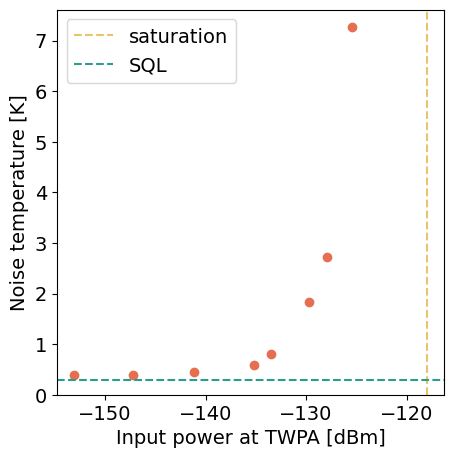

In [14]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))

ax.plot(P_cal_in, T_cal,'o', color = colors[5])
ax.axvline(-118, color=colors[3], linestyle='--', label='saturation')
ax.axhline(0.3, color=colors[1], linestyle='--', label='SQL')
ax.set_xlabel('Input power at TWPA [dBm]')
ax.set_ylabel('Noise temperature [K]')

plt.ylim(0, None)
plt.legend()
plt.show()